<a href="https://colab.research.google.com/github/Zahra1725-dot/ML-Projects/blob/main/FazzyC_means_on_Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install scikit-fuzzy

In [29]:
import skfuzzy as fuzz
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from sklearn.datasets import load_breast_cancer

In [31]:
cancer= load_breast_cancer()

In [32]:
X=cancer.data
y = cancer.target
X.shape, y.shape

((569, 30), (569,))

In [33]:
X=X[:, :2] #mean radius و mean texture

In [34]:
X.shape

(569, 2)

In [35]:
n_clusters=2
m=2.0
error=0.005
maxiter=1000

In [36]:
cntr, u, u0, d, jm, p, fpc = fuzz.cmeans(X.T, n_clusters, m, error, maxiter)

In [37]:
cluster_membership= np.argmax(u, axis=0)

In [ ]:
print("centers of recegnized clusters:\n", np.round(cntr, 2))
print("\membership_matrix (for first five samples):\n", np.round(u[:, :5], 3))

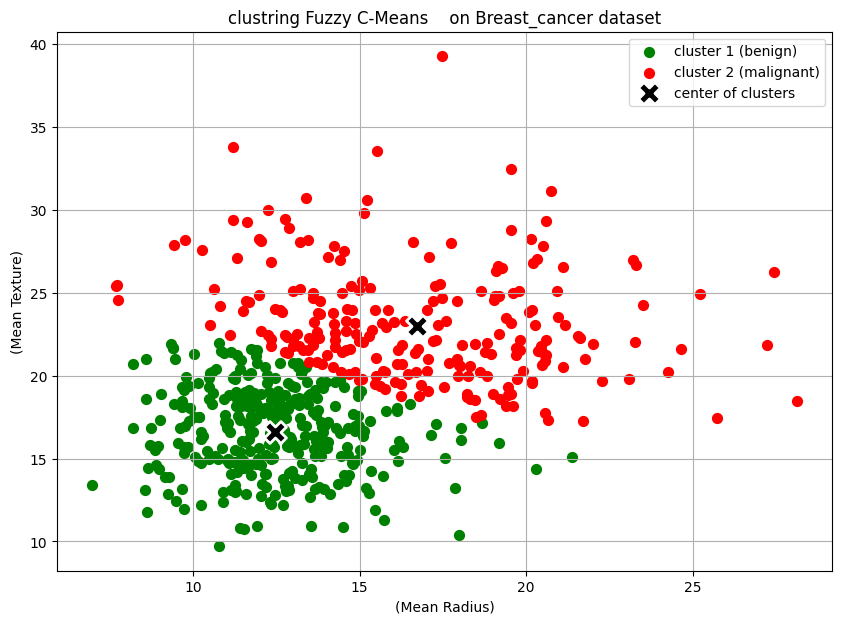

In [39]:
plt.figure(figsize=(10, 7))

colors = ['green', 'red']
labels = ['benign', 'malignant']
for j in range(n_clusters):
    plt.scatter(X[cluster_membership == j, 0],
                X[cluster_membership == j, 1],
                s=50,
                color=colors[j],
                label=f'cluster {j+1} ({labels[j]})')

plt.scatter(cntr[0, :], cntr[1, :],
            marker='X', s=250, c='black', edgecolor='white', linewidth=2, label='center of clusters ')

plt.title('clustring Fuzzy C-Means    on Breast_cancer dataset')
plt.xlabel('(Mean Radius)')
plt.ylabel('(Mean Texture)')
plt.legend()
plt.grid(True)
plt.show()